# Multi-Part Ocean Regression - Support Vector Machines

In [1]:
#Data Processing and Management
import os
import glob
import csv
import pandas as pd
import numpy as np
import math

#Machine Learning Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

#ML Model
from sklearn.svm import SVR

#Model and Data Analysis
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Imaging and Plotting
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest

%matplotlib inline

### Import Data

In [2]:
path = PATH


#Pull in Wavenumbers for Plotting
wavenumbers = pd.read_csv(path + '//'+'Wavenumbers.csv')
#Pull in water references
water =pd.read_csv(path + '//'+'Water.csv')

#Lab Water Samples with Spikes
N_Dataset = pd.read_csv(path + '//'+'N_Dataset.csv')
N_Concs = pd.read_csv(path + '//'+'Ocean_ML_Concs_N_Samples.csv')
N_Concs.drop(columns=N_Concs.columns[0], axis=1, inplace=True)
N_Concs = N_Concs.T
#Field Samples with Spikes
F_Dataset = pd.read_csv(path + '//'+'F_Dataset.csv')
F_Dataset_UNCHANGED = pd.read_csv(path + '//'+'F_Dataset.csv')
F_Concs = pd.read_csv(path + '//'+'Ocean_ML_Concs_F_Samples.csv')
F_Concs.drop(columns=F_Concs.columns[0], axis=1, inplace=True)
F_Concs = F_Concs.T
#Field Samples Without Spikes
Field_Samples = pd.read_csv(path + '//'+'Field_Samples.csv')
Field_Concs = pd.read_csv(path + '//'+'Ocean_ML_Concs_FIELD.csv')
Field_Concs.drop(columns=Field_Concs.columns[0], axis=1, inplace=True)

In [3]:
wavenumbers.iloc[300]

Wavelength    1283.61119
Name: 300, dtype: float64

Text(0.5, 1.0, 'Lab Water with Spikes Before Normalization and Baseline Correction')

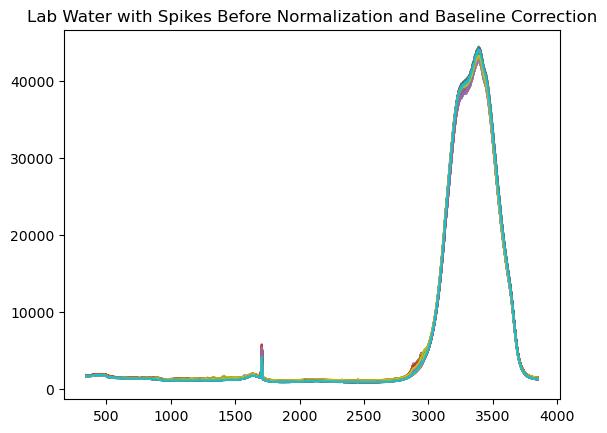

In [4]:
plt.plot(wavenumbers, N_Dataset);
plt.title("Lab Water with Spikes Before Normalization and Baseline Correction")

Text(0.5, 1.0, 'Lab Water with Spikes Before Normalization and Baseline Correction')

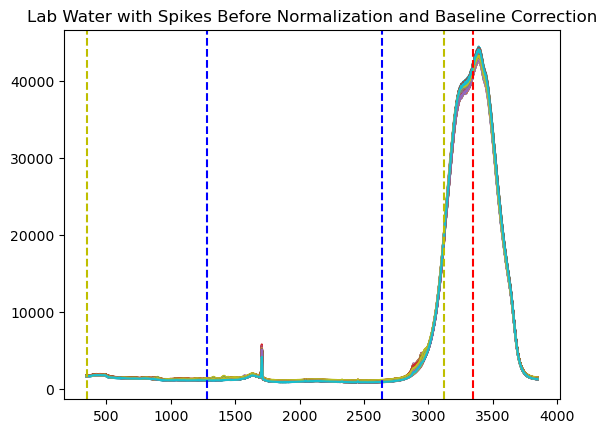

In [5]:
plt.plot(wavenumbers, N_Dataset);
plt.axvline(x=1283.61119, ymin=0, ymax=1, color='b', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=2640.722544, ymin=0, ymax=1, color='b', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=3343.751176, ymin=0, ymax=1, color='r', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=3117.269885, ymin=0, ymax=1, color='y', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=346.093078, ymin=0, ymax=1, color='y', ls='--', lw=1.5, label='axvline - % of full height')

plt.title("Lab Water with Spikes Before Normalization and Baseline Correction")

In [6]:
N_Dataset.drop(index=[446, 447, 448], inplace = True)
avg = N_Dataset.iloc[300:800,:].mean()
N_Dataset.iloc[0:1000,:] = N_Dataset.iloc[0:1000,:] - avg
N_Dataset = N_Dataset/N_Dataset.iloc[1100,:]

wavenumbers.drop(index=[446, 447, 448], inplace = True)

Text(0.5, 1.0, 'Lab Water with Spikes After Normalization and Baseline Correction')

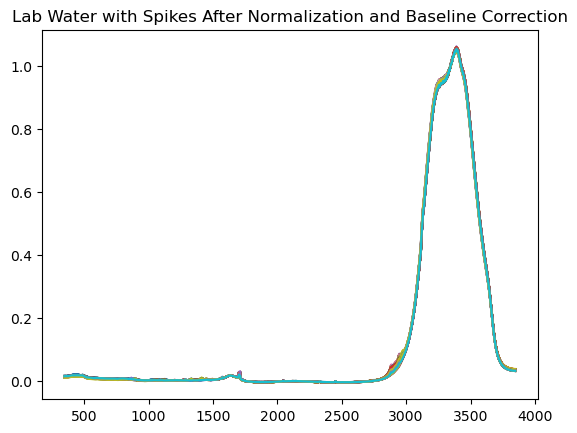

In [7]:
plt.plot(wavenumbers, N_Dataset);
plt.title("Lab Water with Spikes After Normalization and Baseline Correction")

Text(0.5, 1.0, 'Lab Water with Spikes After Normalization and Baseline Correction')

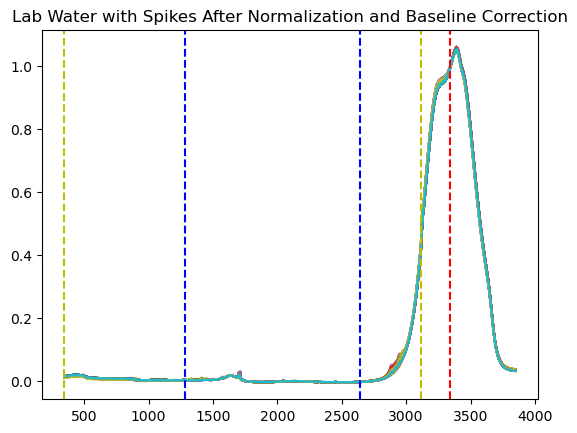

In [8]:
plt.plot(wavenumbers, N_Dataset);
plt.axvline(x=1283.61119, ymin=0, ymax=1, color='b', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=2640.722544, ymin=0, ymax=1, color='b', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=3343.751176, ymin=0, ymax=1, color='r', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=3117.269885, ymin=0, ymax=1, color='y', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=346.093078, ymin=0, ymax=1, color='y', ls='--', lw=1.5, label='axvline - % of full height')
plt.title("Lab Water with Spikes After Normalization and Baseline Correction")

Text(0.5, 1.0, 'Field Samples With Spikes Before Normalization and Baseline Correction')

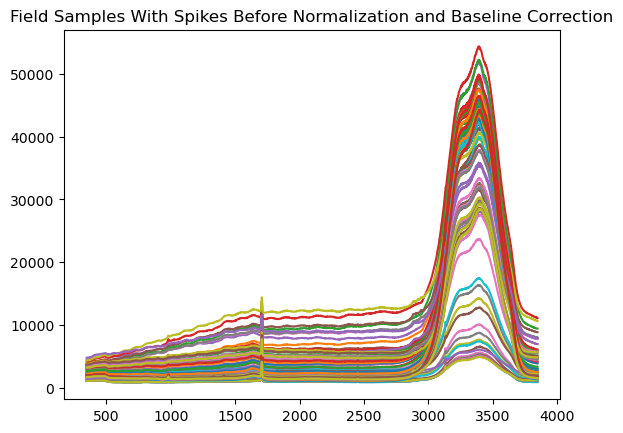

In [9]:
wavenumbers = pd.read_csv(path + '//'+'Wavenumbers.csv')
plt.plot(wavenumbers, F_Dataset);
plt.title("Field Samples With Spikes Before Normalization and Baseline Correction")

Text(0.5, 1.0, 'Field Samples With Spikes Before Normalization and Baseline Correction')

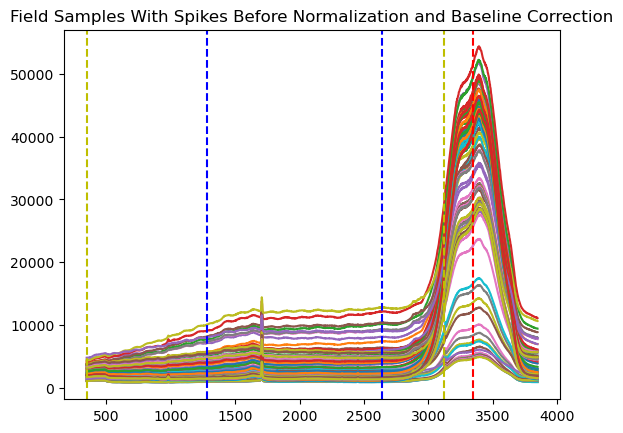

In [10]:
wavenumbers = pd.read_csv(path + '//'+'Wavenumbers.csv')
plt.plot(wavenumbers, F_Dataset);
plt.axvline(x=1283.61119, ymin=0, ymax=1, color='b', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=2640.722544, ymin=0, ymax=1, color='b', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=3343.751176, ymin=0, ymax=1, color='r', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=3117.269885, ymin=0, ymax=1, color='y', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=346.093078, ymin=0, ymax=1, color='y', ls='--', lw=1.5, label='axvline - % of full height')
plt.title("Field Samples With Spikes Before Normalization and Baseline Correction")

In [11]:
F_Dataset.drop(index=[446, 447, 448], inplace = True)
avg = F_Dataset.iloc[500:800,:].mean()
F_Dataset.iloc[0:1000,:] = F_Dataset.iloc[0:1000,:] - avg
F_Dataset = F_Dataset/F_Dataset.iloc[1100,:]

wavenumbers.drop(index=[446, 447, 448], inplace = True)

Text(0.5, 1.0, 'Field Samples With Spikes After Normalization and Baseline Correction')

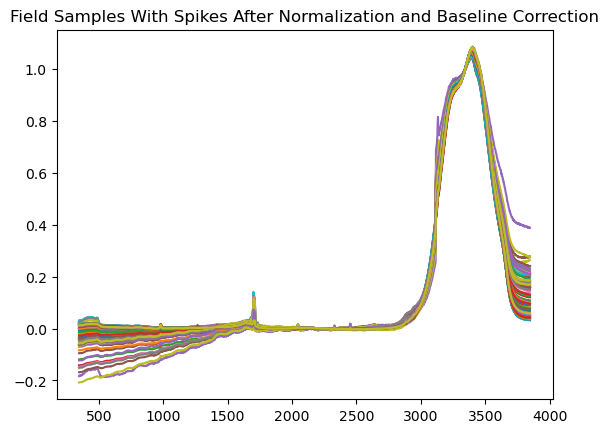

In [12]:
plt.plot(wavenumbers, F_Dataset);
plt.title("Field Samples With Spikes After Normalization and Baseline Correction")

Text(0.5, 1.0, 'Field Samples With Spikes After Normalization and Baseline Correction')

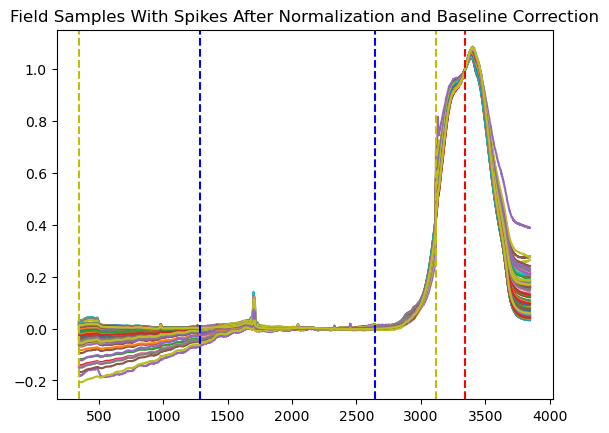

In [13]:
plt.plot(wavenumbers, F_Dataset);
plt.axvline(x=1283.61119, ymin=0, ymax=1, color='b', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=2640.722544, ymin=0, ymax=1, color='b', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=3343.751176, ymin=0, ymax=1, color='r', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=3117.269885, ymin=0, ymax=1, color='y', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=346.093078, ymin=0, ymax=1, color='y', ls='--', lw=1.5, label='axvline - % of full height')
plt.title("Field Samples With Spikes After Normalization and Baseline Correction")